In [40]:
#import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
import numpy as np

In [3]:
#st.title('CNN JOB MON')

def load_data():
    url = 'http://43.202.66.118:8006/all'
    r = requests.get(url)
    d = r.json()
    return d

In [4]:
data = load_data()
df = pd.DataFrame(data)
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [4]:
df['request_time'] = pd.to_datetime(df['request_time'])
df['request_time'] = df['request_time'].dt.strftime('%Y-%m-%d %H')
time = df.groupby('request_time').size()

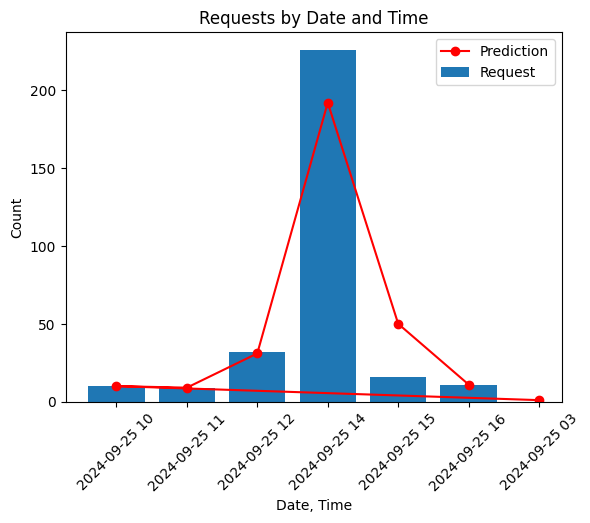

In [45]:
df['request_time'] = pd.to_datetime(df['request_time']).dt.strftime('%Y-%m-%d %H')
df['prediction_time'] = pd.to_datetime(df['prediction_time']).dt.strftime('%Y-%m-%d %H')
req_time = df.groupby('request_time').size()
pre_time = df.groupby('prediction_time').size()

plt.title("Requests by Date and Time")
#plt.text(3.5, 220, 'High', fontdict=font1)
plt.bar(req_time.index, req_time.values, label='Request')
plt.plot(pre_time.index, pre_time.values, marker='o', color='r', label='Prediction')
plt.xlabel('Date, Time')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend()

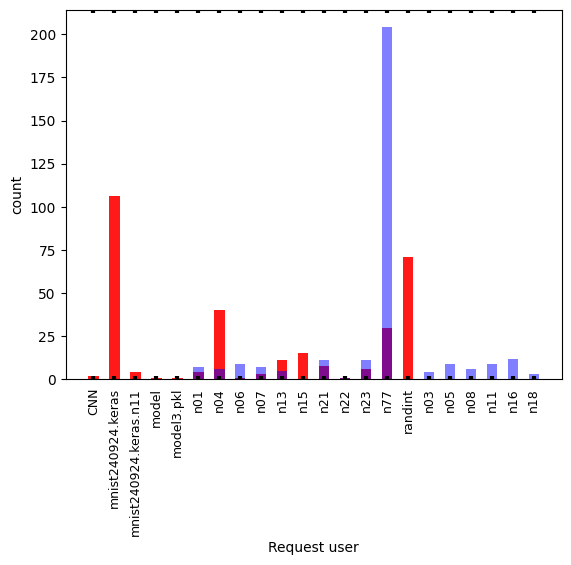

In [92]:
df['request_user']
df['prediction_model']
user = df.groupby('request_user').size()
model = df.groupby('prediction_model').size()

index = np.arange(2)
bar_width = 0.5

#plt.bar(time.index, time.values)
#plt.bar(model.index, model.values)
#plt.plot(model.index, model.values, marker='x', color='y')
#plt.bar(user.index, user.values)
plt.bar(model.index, model.values, bar_width, alpha=0.9, color='r', label="model")
plt.bar(user.index, user.values, bar_width, alpha=0.5, color='b', label="model")


plt.xlabel('Request user')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.tick_params(axis='x', direction='in', length=2, pad=6, labelsize=9, width= 3, labelcolor='black', top=True)
#plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=1, color='r')

plt.show()

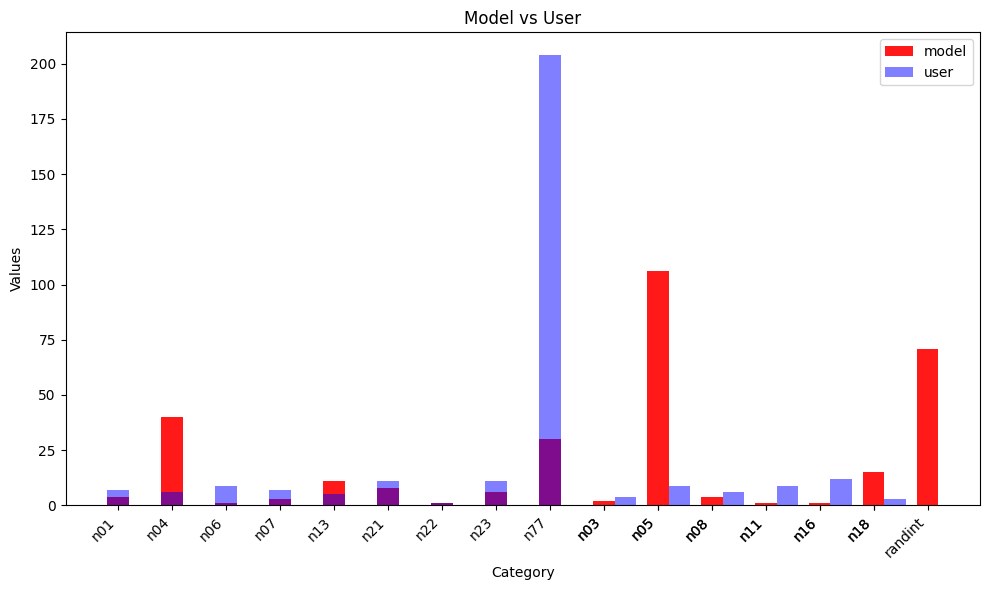

In [84]:
df['request_user']
df['prediction_model']
user = df.groupby('request_user').size()
model = df.groupby('prediction_model').size()

bar_width = 0.4
# 공통되는 x축 좌표 (50% 겹치는 부분)
common_index = np.intersect1d(model.index, user.index)

x_common = np.arange(len(common_index))
# model과 user 각각 독립적인 부분 (겹치지 않는 x축)
model_only_index = np.setdiff1d(model.index, common_index)
user_only_index = np.setdiff1d(user.index, common_index)

x_model_only = np.arange(len(model_only_index)) + len(x_common)
x_user_only = np.arange(len(user_only_index)) + len(x_common)

x = np.arange(len(model.index))

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 공통된 인덱스(겹치는 부분) -> 같은 x 좌표에 그리기
plt.bar(x[:len(common_index)], model.loc[common_index].values, bar_width, alpha=0.9, color='r', label="model")
plt.bar(x[:len(common_index)], user.loc[common_index].values, bar_width, alpha=0.5, color='b', label="user")

# 겹치지 않는 부분 각각의 막대를 나란히 배치 (x축 좌표 + bar_width)
plt.bar(x[len(common_index):len(common_index)+len(model_only_index)], model.loc[model_only_index].values, bar_width, alpha=0.9, color='r')
plt.bar(x[len(common_index):len(common_index)+len(user_only_index)] + bar_width, user.loc[user_only_index].values, bar_width, alpha=0.5, color='b')

x_labels = np.concatenate([common_index, model_only_index, user_only_index])
plt.xticks(np.concatenate([x_common, x_model_only, x_user_only]), x_labels, rotation=45, ha="right")
# x축 레이블, 범례 추가
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Model vs User')
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

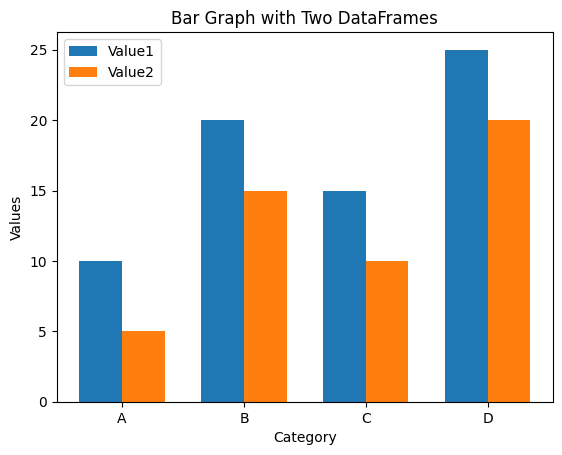

In [91]:
# 예시 DataFrame 생성
data1 = {'Category': ['A', 'B', 'C', 'D'],
         'Value1': [10, 20, 15, 25]}
data2 = {'Category': ['A', 'B', 'C', 'D'],
         'Value2': [5, 15, 10, 20]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 공통된 x축 (Category)
categories = df1['Category']

# bar의 너비 설정
bar_width = 0.35

# x축 인덱스
index = np.arange(len(categories))

# Figure와 Axes 객체 생성
fig, ax = plt.subplots()

# 첫 번째 DataFrame의 bar 생성
bar1 = ax.bar(index, df1['Value1'], bar_width, label='Value1')

# 두 번째 DataFrame의 bar 생성 (x축 위치 조정)
bar2 = ax.bar(index + bar_width, df2['Value2'], bar_width, label='Value2')

# x축 레이블 설정
ax.set_xlabel('Category')
ax.set_ylabel('Values')
ax.set_title('Bar Graph with Two DataFrames')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

# 범례 추가
ax.legend()

# 그래프 출력
plt.show()